In [1]:
import matplotlib.pylab as plt

def get_acc(filename):
    file = open(filename, 'r')
    lines = file.readlines()
    
    best_acc = []
    for line in lines:
        if "Train Epoch" in line:
            best_acc.append(float(line.split("Best Accuracy:")[-1].split('%')[0]))
    #acc.append(best_acc)
    
    return best_acc

def plot_dict(data, title):
    plt.figure(figsize=(8,8))
    
    for key in data:
        if key == 'lt':
            plt.plot(data[key], label=key,c='black')
        elif 'g_kl' in key:
            plt.plot(data[key], label=key,ls='dotted')
        else:
            plt.plot(data[key], label=key,ls='-.')
    
    plt.legend()
    plt.title(title)
    plt.xlabel("Pruning Iter")
    plt.ylabel("Acc")
    #plt.savefig(title+".png")
    plt.show()
    
    return

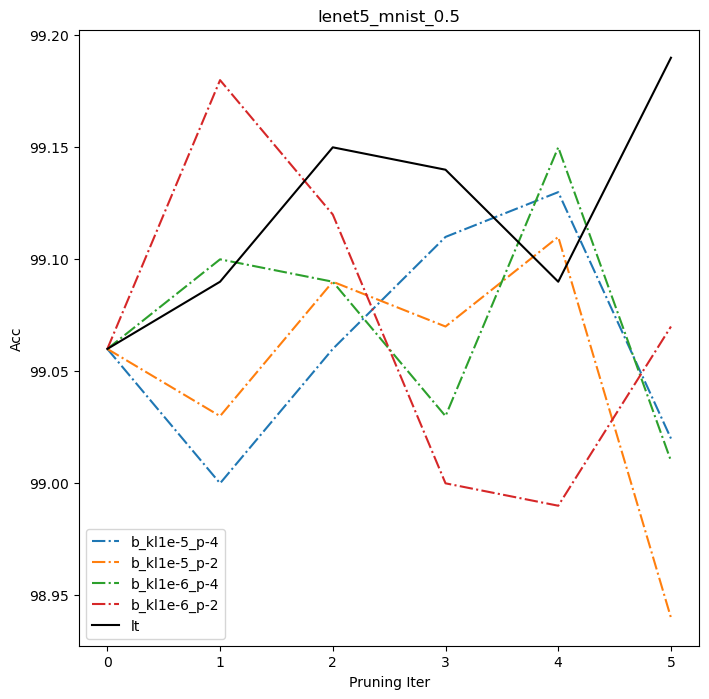

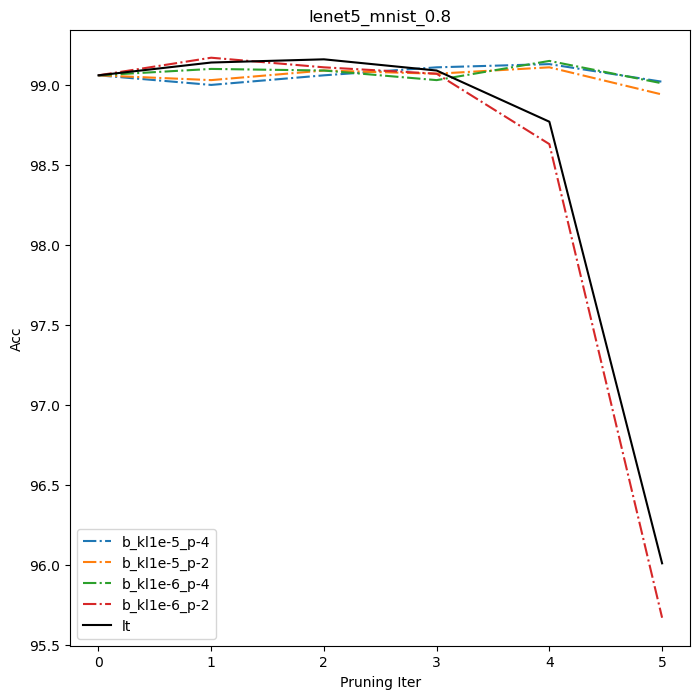

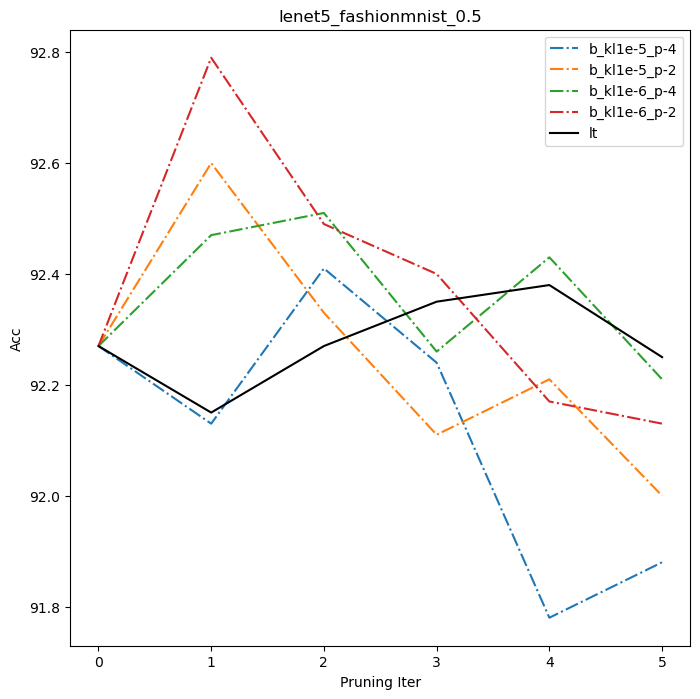

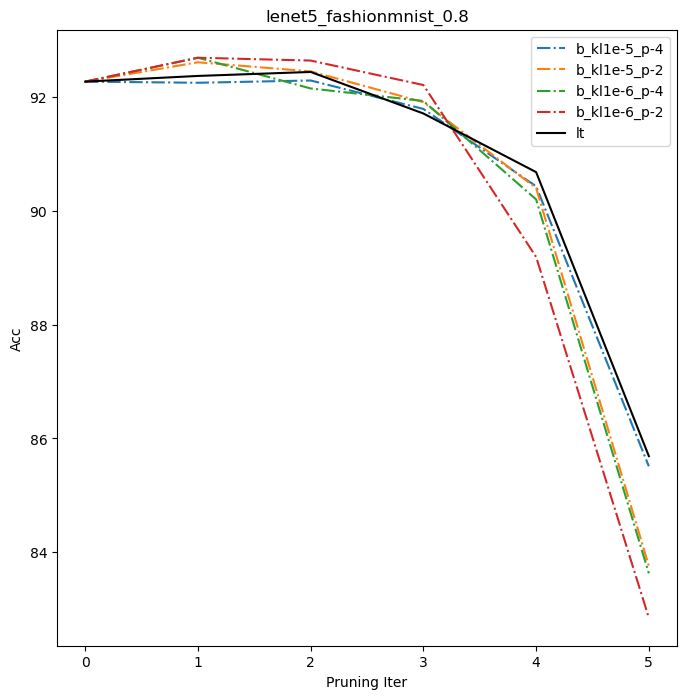

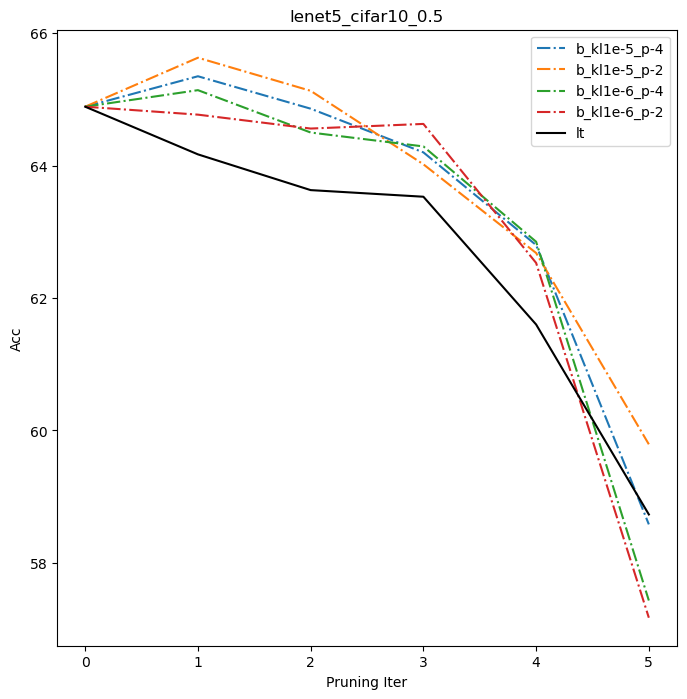

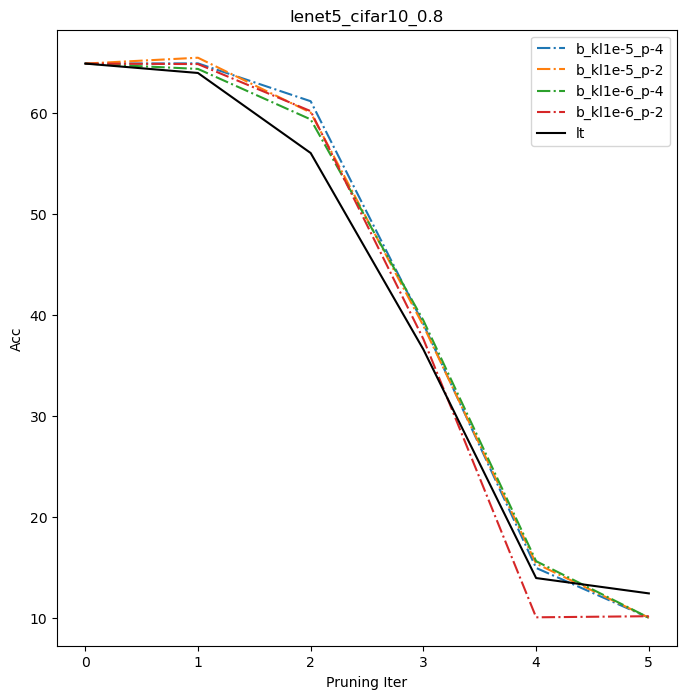

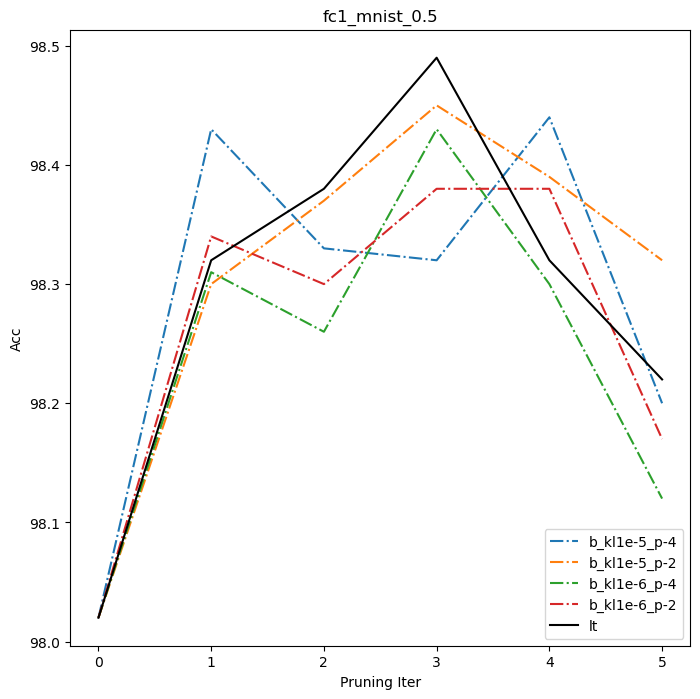

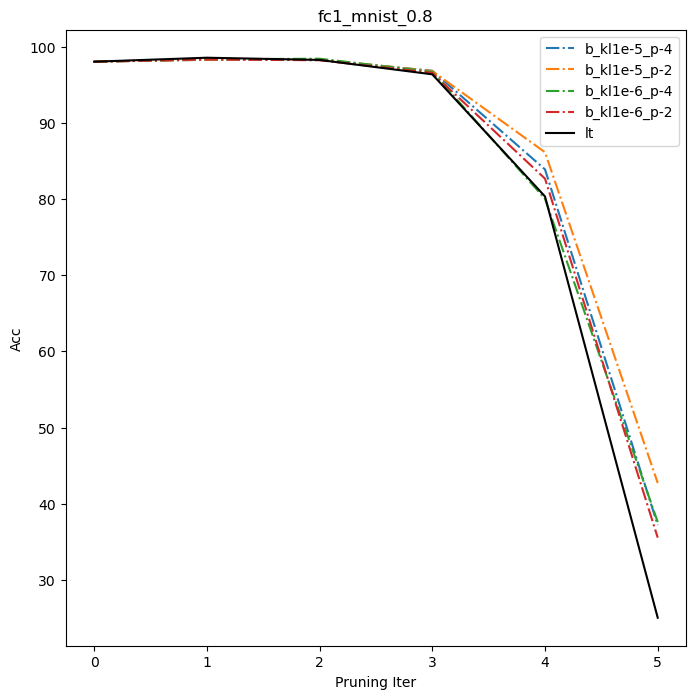

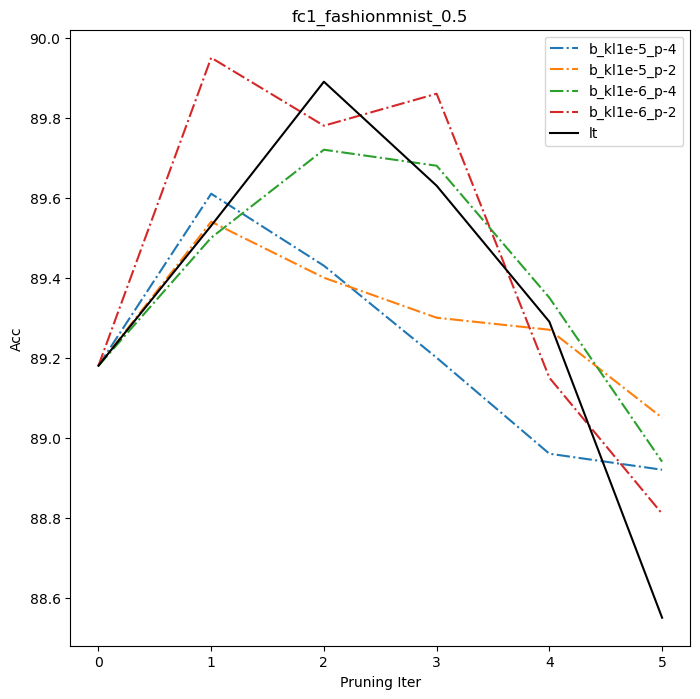

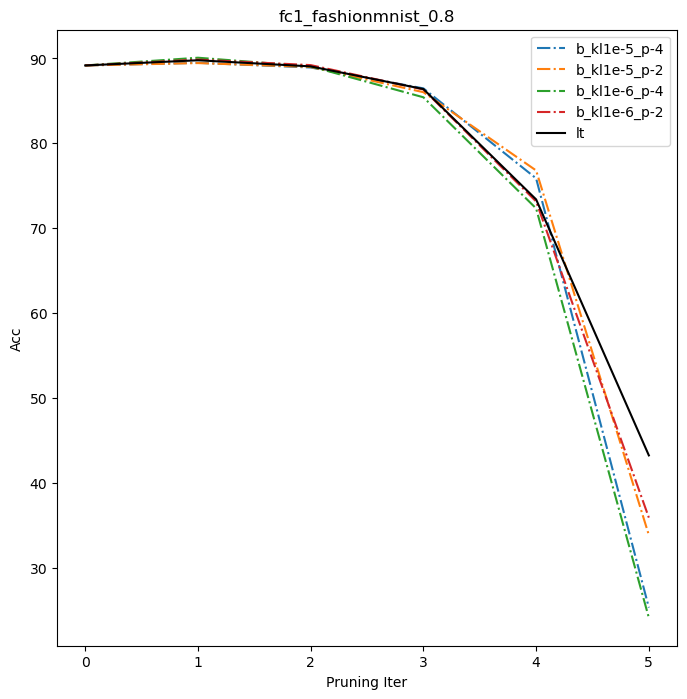

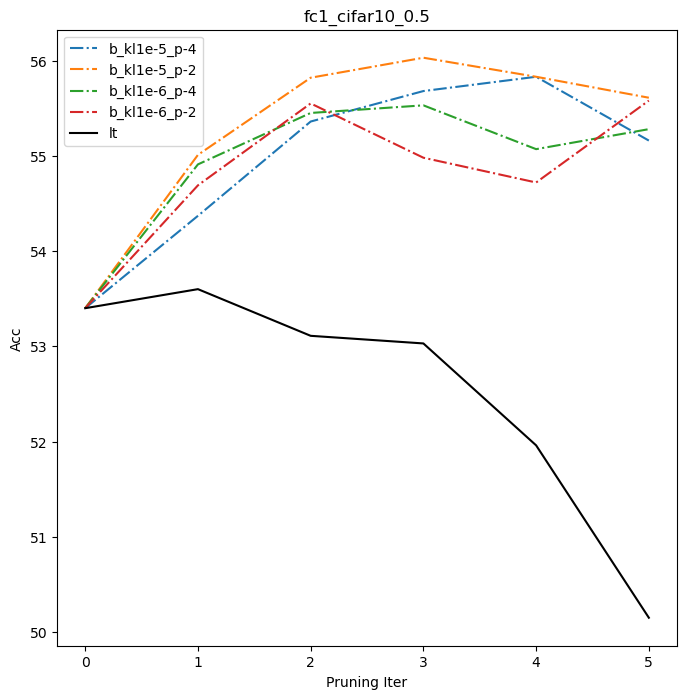

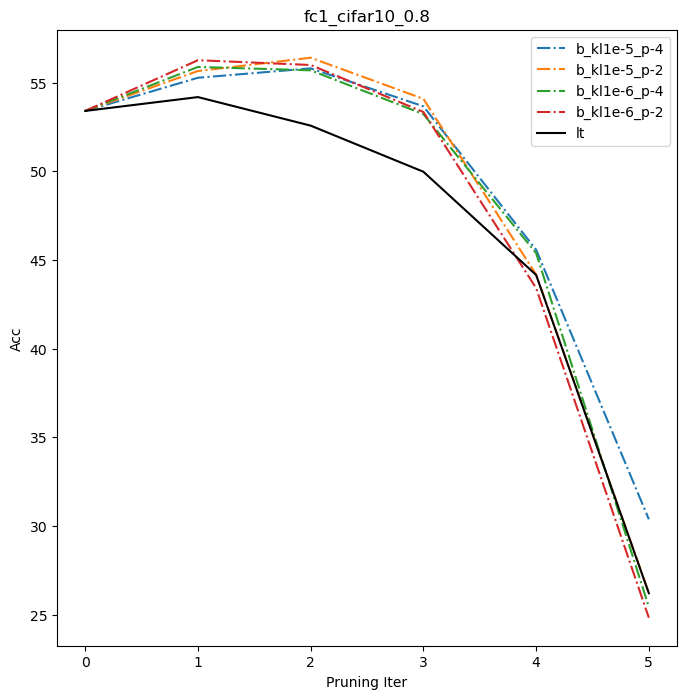

In [2]:
datasets = ['mnist', 'fashionmnist', 'cifar10']
model = ['lenet5', 'fc1']
prune_rate = [0.5, 0.8]
kls = ["1e-5", "1e-6"]
priors = [-4, -2]
root = 'Adam_rerun/'

acc = []
for arch_type in model:
    
    for dataset in datasets:
        
        for percent in prune_rate:
            
            KL_prune = {}
            for kl in kls:
                for prior in priors:
                    file = (root+"bernoulli_kl{"+kl+
                            "}_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_prior{"+str(prior)+
                            "}_percent{"+str(percent)+"}.out")
                    KL_prune["b_kl"+kl+'_p'+str(prior)] = get_acc(file)
        
            file = (root+"lt_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_percent{"+str(percent)+"}.out")
            KL_prune["lt"] = get_acc(file)
            #print(len(KL_prune))       
            plot_dict(KL_prune, arch_type+'_'+dataset+'_'+str(percent))

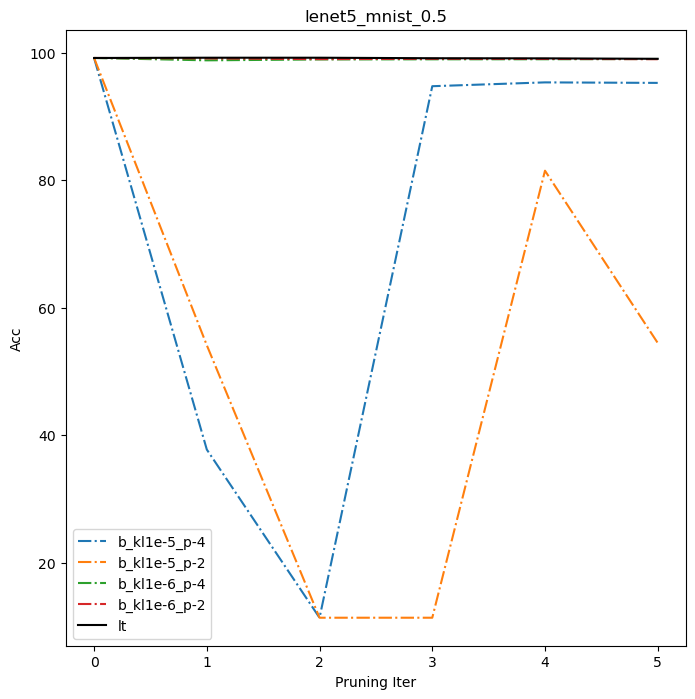

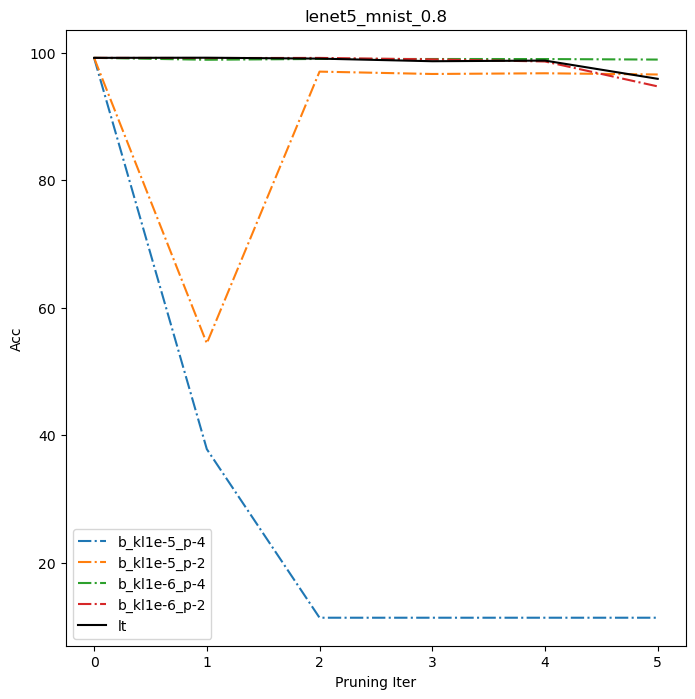

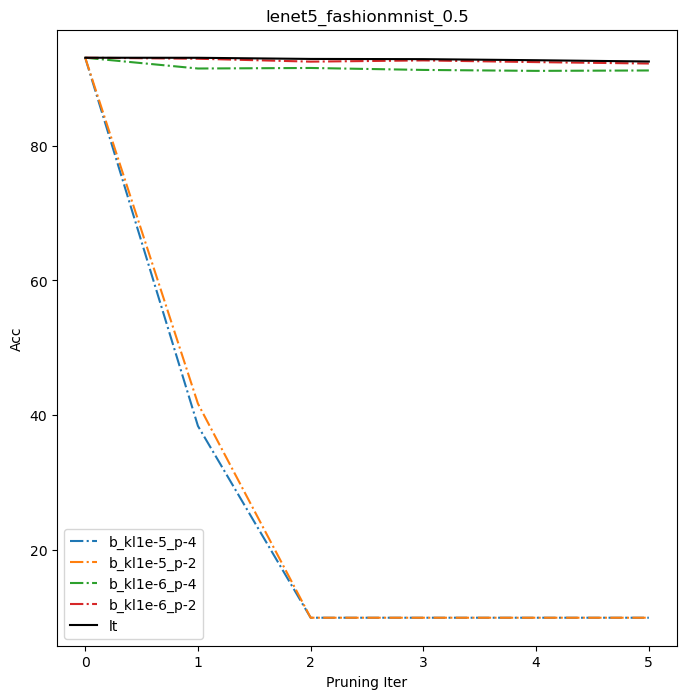

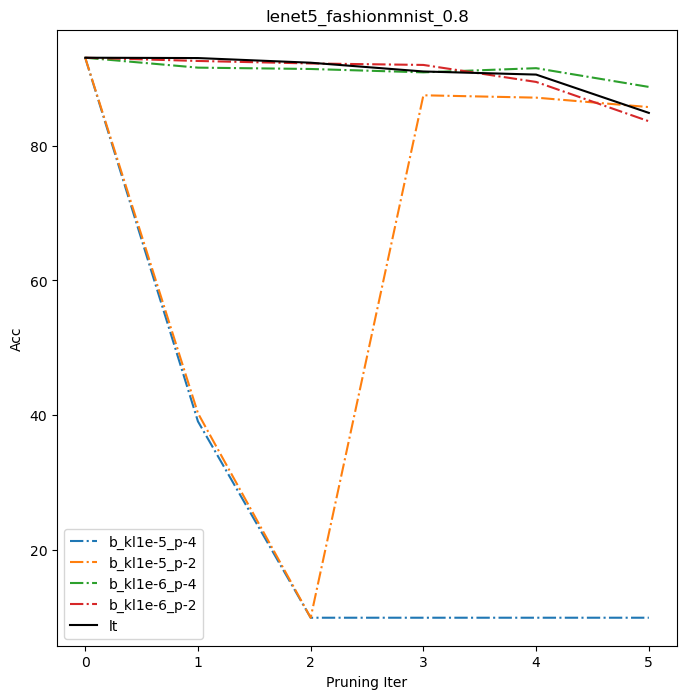

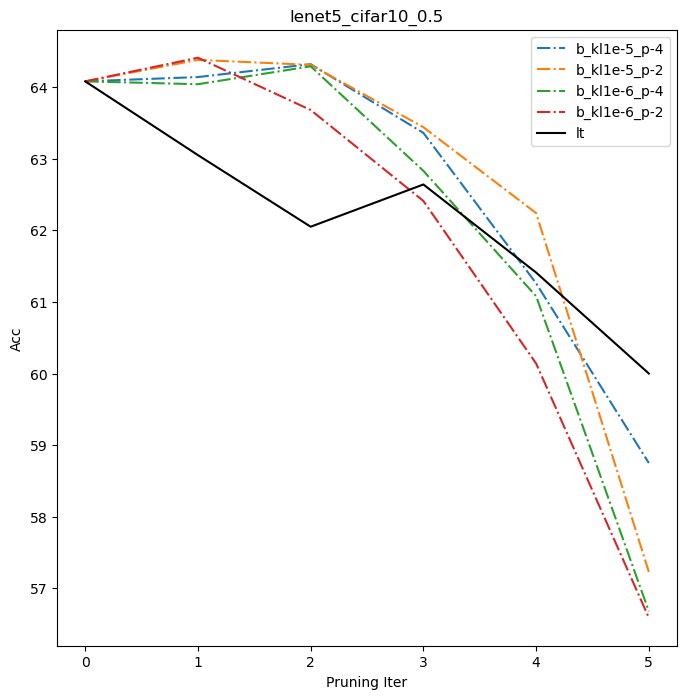

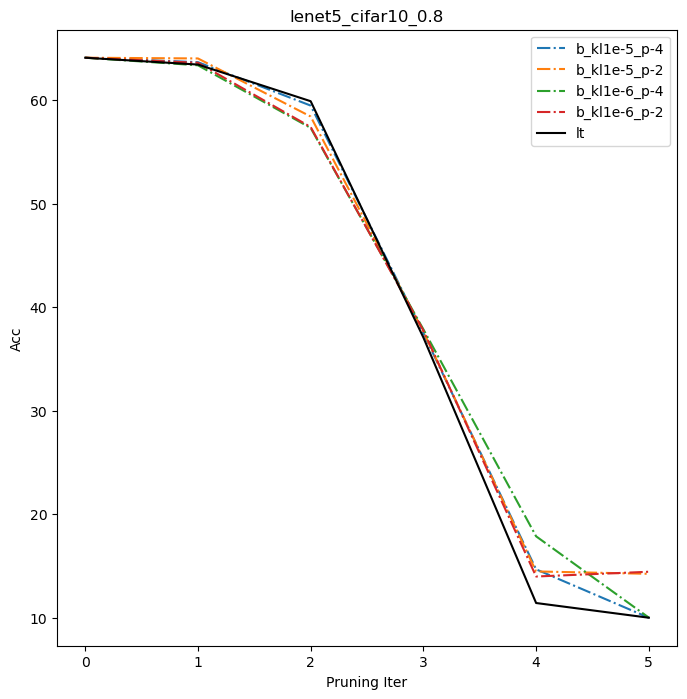

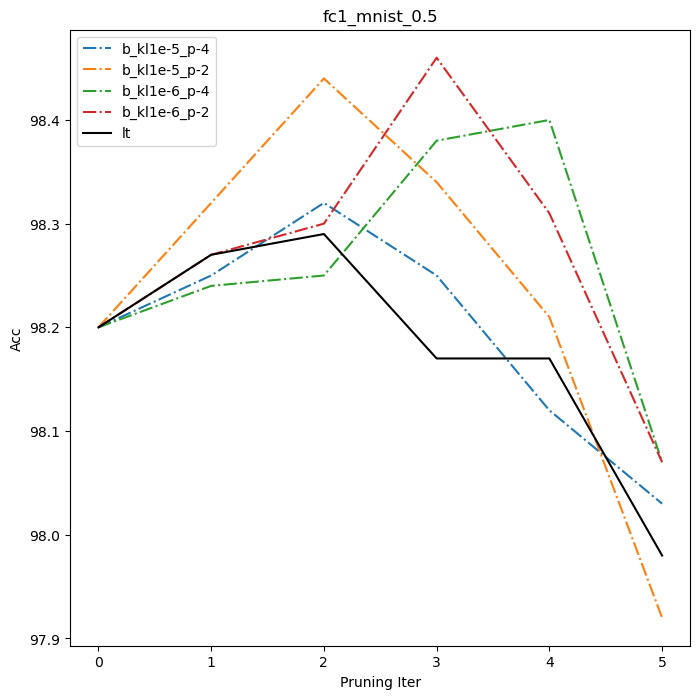

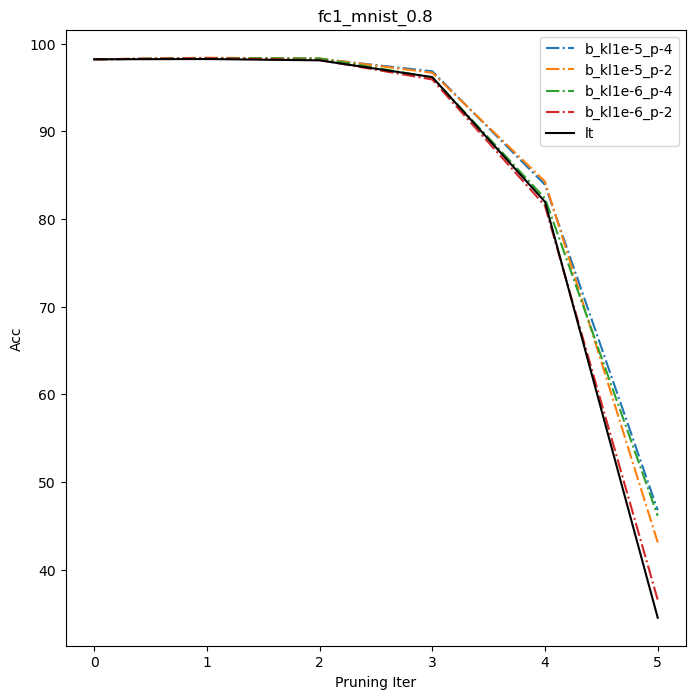

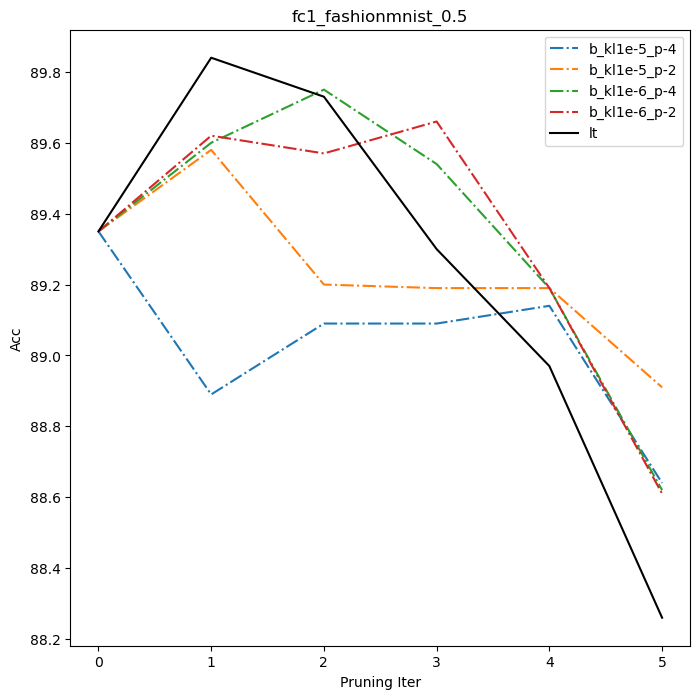

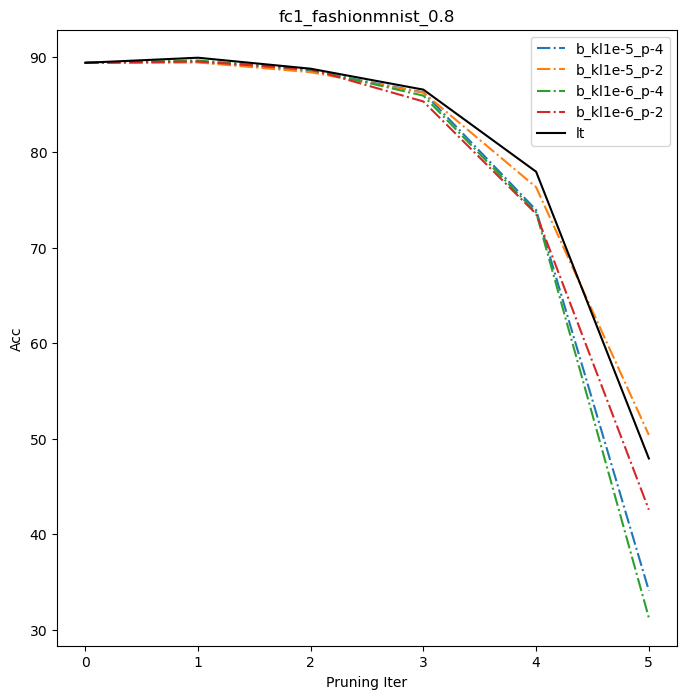

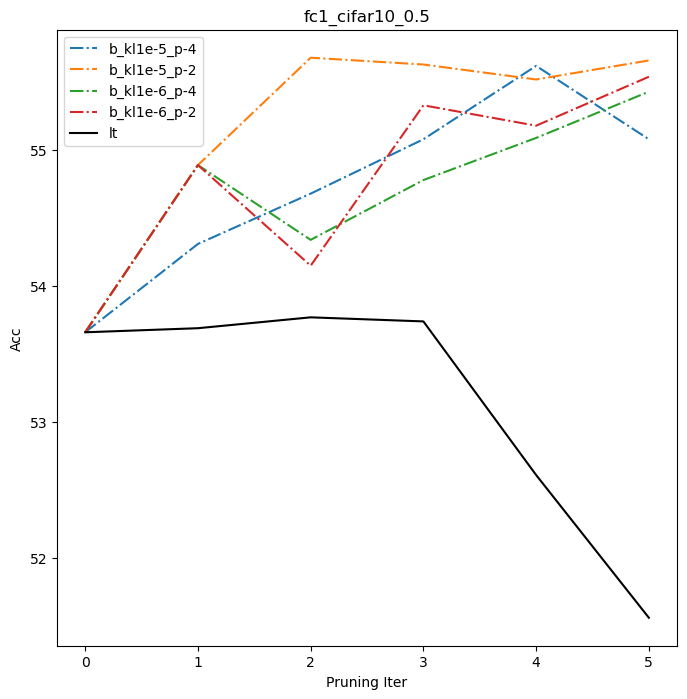

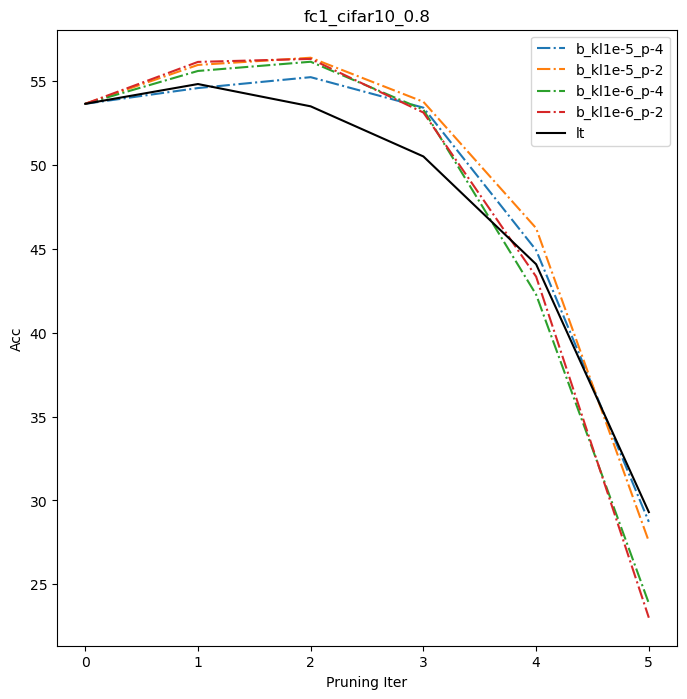

In [3]:
datasets = ['mnist', 'fashionmnist', 'cifar10']
model = ['lenet5', 'fc1']
prune_rate = [0.5, 0.8]
kls = ["1e-5", "1e-6"]
priors = [-4, -2]
root = 'SGD_lr_large/'

acc = []
for arch_type in model:
    
    for dataset in datasets:
        
        for percent in prune_rate:
            
            KL_prune = {}
            for kl in kls:
                for prior in priors:
                    file = (root+"bernoulli_kl{"+kl+
                            "}_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_prior{"+str(prior)+
                            "}_percent{"+str(percent)+"}.out")
                    KL_prune["b_kl"+kl+'_p'+str(prior)] = get_acc(file)
        
            file = (root+"lt_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_percent{"+str(percent)+"}.out")
            KL_prune["lt"] = get_acc(file)
            #print(len(KL_prune))       
            plot_dict(KL_prune, arch_type+'_'+dataset+'_'+str(percent))